In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, applications, utils, preprocessing, callbacks
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import ResNet50

### Download the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Scale pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0 

# make labels one-hot representation
train_labels_one_hot = tf.one_hot(train_labels, 10)[:, 0, :]
test_labels_one_hot = tf.one_hot(test_labels, 10)[:, 0, :]

170508288/170498071 [==============================] - 3s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

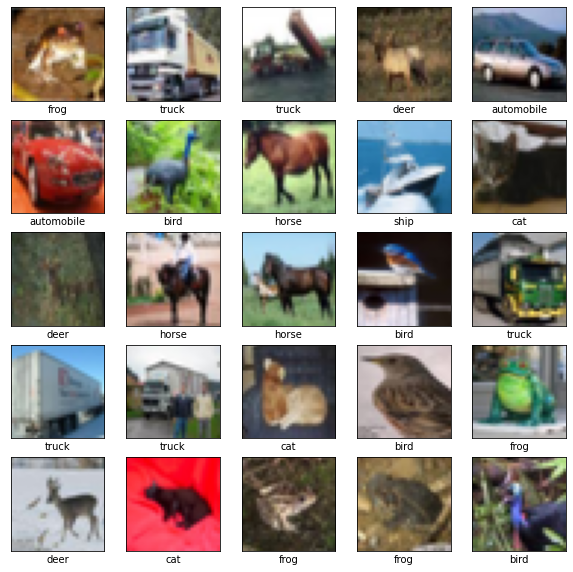

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Build Model

In [68]:
# TODO 
# Build your own model
# TODO
# Replace this with your own model, use transfer learning.
model = models.Sequential()

# Convolution Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='linear', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Convolution Layer 2
model.add(layers.Conv2D(32, (3, 3), activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Convolution Layer 4
model.add(layers.Conv2D(64, (3, 3), activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Convolution Layer 5
model.add(layers.Conv2D(128, (3, 3), activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Convolution Layer 6
model.add(layers.Conv2D(128, (3, 3), activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

# Convolution Layer 7
model.add(layers.Conv2D(256, (3, 3), activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

# Convolution Layer 9
model.add(layers.Conv2D(256, (3, 3), activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 

# Flatten 
model.add(layers.GlobalAveragePooling2D())
#we use this instead of flatten, as flatten loses more information

#model.add(layers.Flatten())

# Fully Connected Layer 10
model.add(layers.Dense(1024, activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))

# Fully Connected Layer 11
model.add(layers.Dense(512, activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))

# Fully Connected Layer 12
model.add(layers.Dense(256, activation='linear'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.2))

# Output Layer                       
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_96 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_111 (Ba  (None, 30, 30, 32)       128       
 tchNormalization)                                               
                                                                 
 activation_103 (Activation)  (None, 30, 30, 32)       0         
                                                                 
 conv2d_97 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_112 (Ba  (None, 28, 28, 32)       128       
 tchNormalization)                                               
                                                                 
 activation_104 (Activation)  (None, 28, 28, 32)     

In [69]:
n_epochs = 50

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history_cnn = model.fit(train_images,train_labels_one_hot,
                        batch_size=128, epochs=n_epochs,
                        validation_split=0.1,
                        callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)

Epoch 1/50
352/352 [==============================] - 34s 16ms/step - loss: 1.5256 - accuracy: 0.4521 - val_loss: 1.7358 - val_accuracy: 0.4816
Epoch 2/50
352/352 [==============================] - 6s 16ms/step - loss: 1.0867 - accuracy: 0.6163 - val_loss: 1.6733 - val_accuracy: 0.5012
Epoch 3/50
352/352 [==============================] - 7s 20ms/step - loss: 0.8948 - accuracy: 0.6880 - val_loss: 1.1262 - val_accuracy: 0.6200
Epoch 4/50
352/352 [==============================] - 6s 16ms/step - loss: 0.7673 - accuracy: 0.7332 - val_loss: 1.1505 - val_accuracy: 0.6520
Epoch 5/50
352/352 [==============================] - 5s 13ms/step - loss: 0.6886 - accuracy: 0.7616 - val_loss: 0.9558 - val_accuracy: 0.6934
Epoch 6/50
352/352 [==============================] - 5s 13ms/step - loss: 0.6197 - accuracy: 0.7852 - val_loss: 0.9327 - val_accuracy: 0.6880
Epoch 7/50
352/352 [==============================] - 6s 17ms/step - loss: 0.5553 - accuracy: 0.8089 - val_loss: 1.3594 - val_accuracy: 0.614

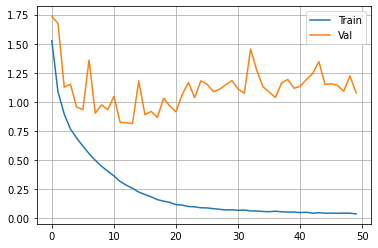

<Figure size 432x288 with 0 Axes>

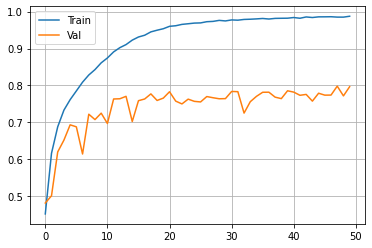

In [72]:
plt.figure()
plt.plot(history_cnn.history['loss'],label='Train')
plt.plot(history_cnn.history['val_loss'],label='Val')
plt.grid()
plt.legend()
plt.figure()
plt.show()
plt.plot(history_cnn.history['accuracy'],label='Train')
plt.plot(history_cnn.history['val_accuracy'],label='Val')
plt.grid()
plt.legend()

In [108]:
#Find test accuracy:
y_hat = np.argmax(model.predict(test_images), axis=-1).reshape(10000,1)     # Prediction on test
test_acc = np.mean(y_hat==test_labels)
print(f"Test Accuracy: {test_acc*100:0.2f}%")

#Accuracy by class:
for i in range(0,10):
  class_indicies = np.where(np.transpose(test_labels)[0] == i)
  correct_count = 0
  total_count = 0
  for j in class_indicies[0]:
    if np.transpose(y_hat)[0][j] == np.transpose(test_labels)[0][j]:
      correct_count+=1
      total_count+=1
    else:
      total_count+=1
  class_acc = correct_count/total_count
  print(f"Class {class_names[i]} accuracy: {class_acc*100:0.2f}%")

correct_indices = np.nonzero(y_hat== test_labels)[0]    # Gives list of indices of correctly classified images
incorrect_indices = np.nonzero(y_hat != test_labels)[0]  # Gives list of indices of misclassified images

Test Accuracy: 78.42%
Class airplane accuracy: 78.00%
Class automobile accuracy: 89.60%
Class bird accuracy: 73.60%
Class cat accuracy: 52.50%
Class deer accuracy: 80.60%
Class dog accuracy: 72.60%
Class frog accuracy: 83.00%
Class horse accuracy: 79.30%
Class ship accuracy: 87.70%
Class truck accuracy: 87.30%


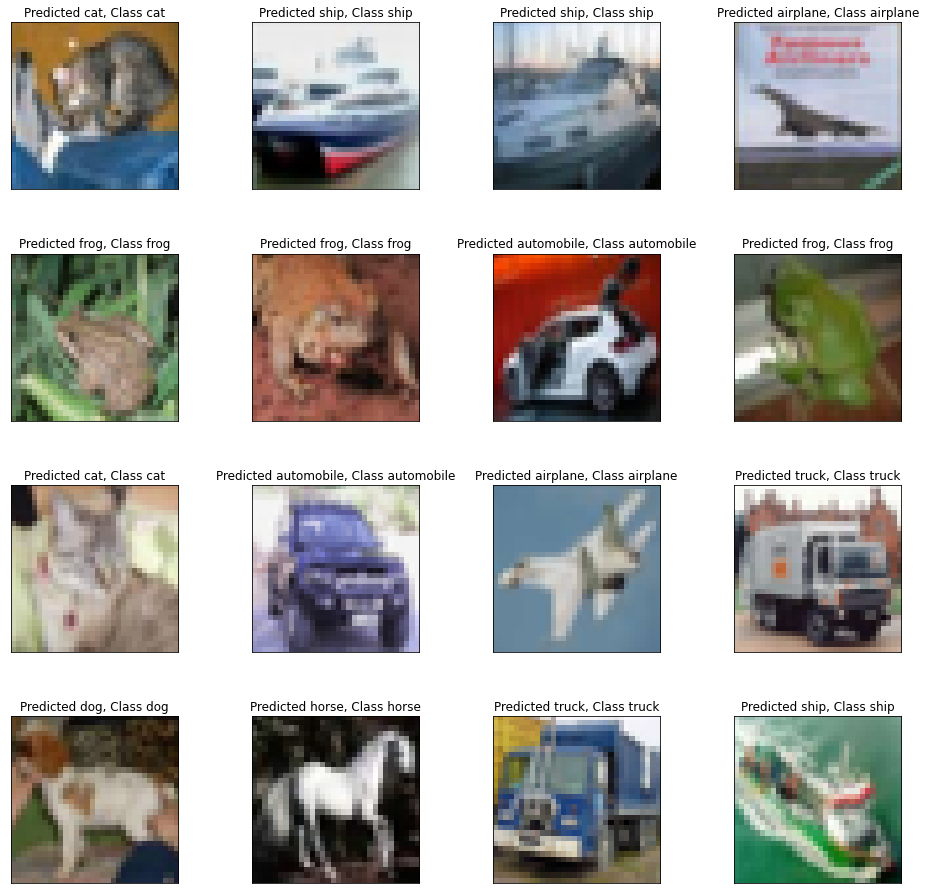

In [109]:
fig = plt.figure()
fig.set_size_inches(13, 13)
for i, index in enumerate(correct_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.title(f"Predicted {class_names[y_hat[index][0]]}, Class {class_names[test_labels[index][0]]}")

plt.tight_layout()

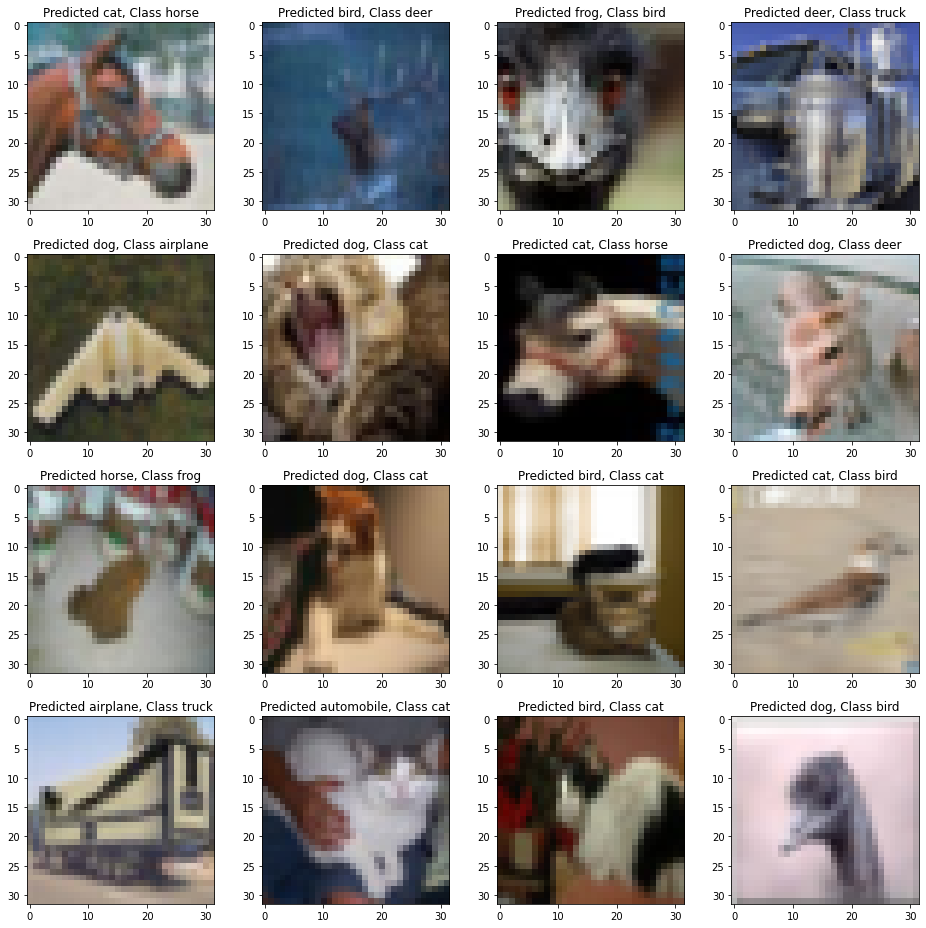

In [110]:
fig = plt.figure()
fig.set_size_inches(13, 13)
for i, index in enumerate(incorrect_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.title(f"Predicted {class_names[y_hat[index][0]]}, Class {class_names[test_labels[index][0]]}")

plt.tight_layout()

## ResNet50:

In [79]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_labels_one_hot = tf.one_hot(train_labels, 10)[:, 0, :]
test_labels_one_hot = tf.one_hot(test_labels, 10)[:, 0, :]

In [84]:
base_model = ResNet50(weights='imagenet',include_top=False,input_shape=(224, 224, 3))
model_resnet = models.Sequential()

## TODO
# add the entire base_model as "first layer"

model_resnet.add(layers.Input(shape=(32, 32, 3)))

# model.add(layers.Resizing(224, 224)) #if you resize, you lose accuracy, image is too stretched out now.

# add an upsampling, retains image pixel frequencies
model_resnet.add(layers.UpSampling2D((7,7))) # upsample by 7. why? 32x7=224, NOTICE OUTPUT SHAPE IN MODEL SUMMARY
model_resnet.add(base_model) 

# add a GlobalAveragePooling2D layer
model_resnet.add(layers.GlobalAveragePooling2D())



# add to the model a Dense layer with 2048 neurons and ReLu activation
model_resnet.add(layers.Dense(2048, activation="relu"))
model_resnet.add(layers.Dropout(0.2))
model_resnet.add(layers.Dense(1024, activation="relu"))
model_resnet.add(layers.Dropout(0.2))
model_resnet.add(layers.Dense(512, activation="relu"))
model_resnet.add(layers.Dropout(0.2))
model_resnet.add(layers.Dense(256, activation="relu"))
model_resnet.add(layers.Dropout(0.2))
# add to the model a Dense output layer with 10 neurons and Softmax activation
model_resnet.add(layers.Dense(10, activation="softmax"))

# WE WANT TO TRAIN THE WEIGHTS AS THE IMAGENET WEIGHTS ARE NOT APPROPRIATE FOR CIFAR 10
# THAT IS WHY WE TRAIN THE BASE MODEL TOO. AND WE DO *NOT* SET BASE MODEL TRAINABLE TO FALSE

model_resnet.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_5 (UpSampling  (None, 224, 224, 3)      0         
 2D)                                                             
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_15  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_54 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_39 (Dropout)        (None, 2048)              0         
                                                                 
 dense_55 (Dense)            (None, 1024)            

In [85]:
n_epochs = 20

model_resnet.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history_resnet = model_resnet.fit(train_images,train_labels_one_hot,
                        batch_size=128, epochs=n_epochs,
                        validation_split=0.15,
                        callbacks=[model_checkpoint_callback])

Epoch 1/20
333/333 [==============================] - 216s 635ms/step - loss: 1.1162 - accuracy: 0.6129 - val_loss: 0.8415 - val_accuracy: 0.7313
Epoch 2/20
333/333 [==============================] - 211s 632ms/step - loss: 0.3169 - accuracy: 0.8960 - val_loss: 0.5229 - val_accuracy: 0.8387
Epoch 3/20
333/333 [==============================] - 210s 631ms/step - loss: 0.1786 - accuracy: 0.9425 - val_loss: 1.1423 - val_accuracy: 0.6203
Epoch 4/20
333/333 [==============================] - 210s 631ms/step - loss: 0.1033 - accuracy: 0.9672 - val_loss: 2.8140 - val_accuracy: 0.4720
Epoch 5/20
333/333 [==============================] - 211s 633ms/step - loss: 0.0679 - accuracy: 0.9778 - val_loss: 0.4408 - val_accuracy: 0.8880
Epoch 6/20
333/333 [==============================] - 210s 631ms/step - loss: 0.0357 - accuracy: 0.9891 - val_loss: 2.4402 - val_accuracy: 0.4973
Epoch 7/20
333/333 [==============================] - 211s 632ms/step - loss: 0.0486 - accuracy: 0.9842 - val_loss: 0.3897 -

In [91]:
model_resnet.load_weights(checkpoint_filepath)

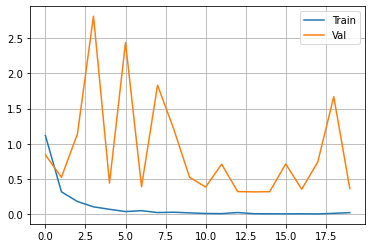

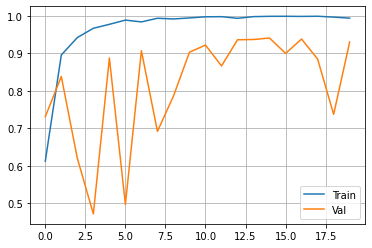

In [86]:
plt.figure()
plt.plot(history_resnet.history['loss'],label='Train')
plt.plot(history_resnet.history['val_loss'],label='Val')
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.plot(history_resnet.history['accuracy'],label='Train')
plt.plot(history_resnet.history['val_accuracy'],label='Val')
plt.grid()
plt.legend()
plt.show()

In [111]:
#Find test accuracy:
y_hat = np.argmax(model_resnet.predict(test_images), axis=-1).reshape(10000,1)     # Prediction on test
test_acc = np.mean(y_hat==test_labels)
print(f"Test Accuracy: {test_acc*100:0.2f}%")

#Accuracy by class:
for i in range(0,10):
  class_indicies = np.where(np.transpose(test_labels)[0] == i)
  correct_count = 0
  total_count = 0
  for j in class_indicies[0]:
    if np.transpose(y_hat)[0][j] == np.transpose(test_labels)[0][j]:
      correct_count+=1
      total_count+=1
    else:
      total_count+=1
  class_acc = correct_count/total_count
  print(f"Class {class_names[i]} accuracy: {class_acc*100:0.2f}%")

correct_indices = np.nonzero(y_hat== test_labels)[0]    # Gives list of indices of correctly classified images
incorrect_indices = np.nonzero(y_hat != test_labels)[0]  # Gives list of indices of misclassified images

Test Accuracy: 93.92%
Class airplane accuracy: 96.00%
Class automobile accuracy: 97.30%
Class bird accuracy: 91.80%
Class cat accuracy: 87.00%
Class deer accuracy: 95.10%
Class dog accuracy: 88.70%
Class frog accuracy: 96.30%
Class horse accuracy: 96.10%
Class ship accuracy: 96.90%
Class truck accuracy: 94.00%


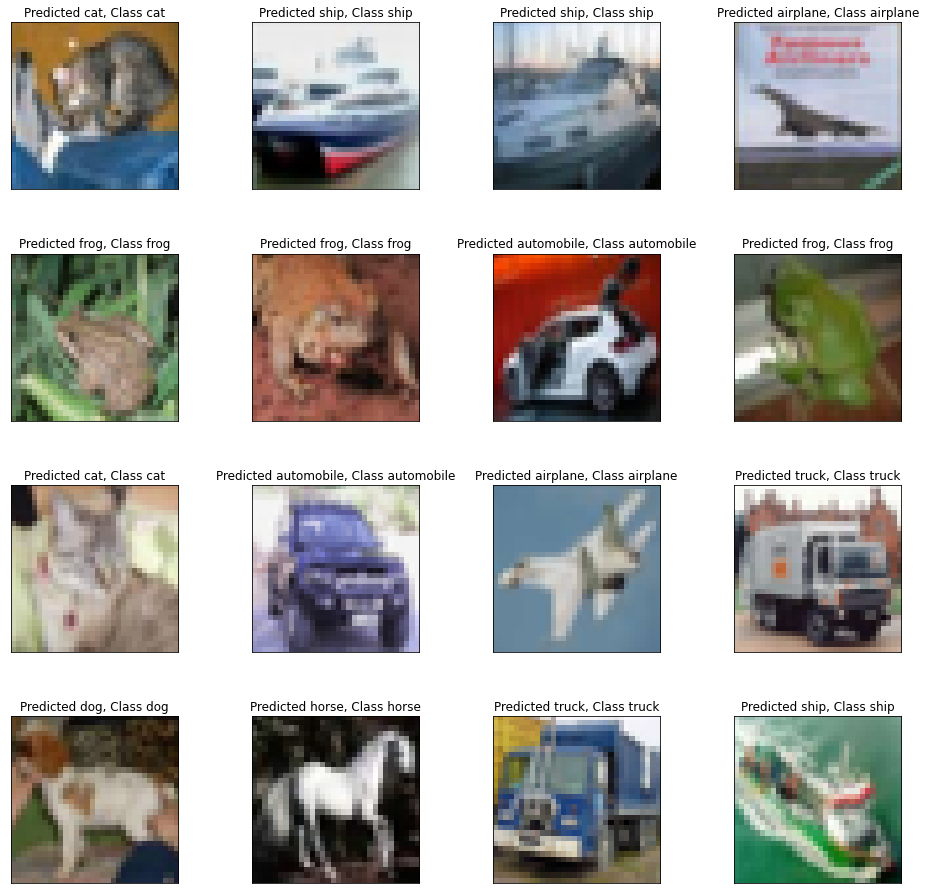

In [112]:
fig = plt.figure()
fig.set_size_inches(13, 13)
for i, index in enumerate(correct_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.title(f"Predicted {class_names[y_hat[index][0]]}, Class {class_names[test_labels[index][0]]}")

plt.tight_layout()

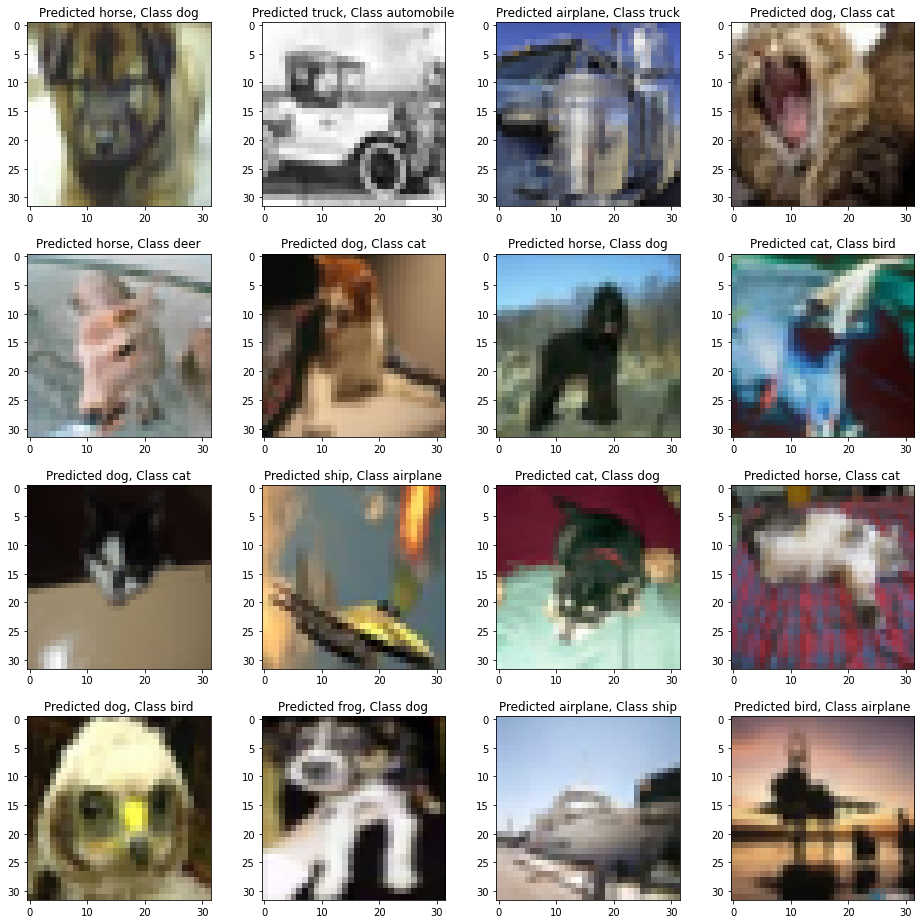

In [113]:
fig = plt.figure()
fig.set_size_inches(13, 13)
for i, index in enumerate(incorrect_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.title(f"Predicted {class_names[y_hat[index][0]]}, Class {class_names[test_labels[index][0]]}")

plt.tight_layout()

## Xception with transfer learning:

In [96]:
xception_model = applications.Xception(include_top=False,
                                       weights="imagenet",
                                       input_shape=(150, 150, 3))

model_xce = models.Sequential()
# add an Input layer
model_xce.add(layers.Input(shape=(32, 32, 3)))
# add resizing layer
model_xce.add(layers.UpSampling2D(size=(4.6875,4.6875)))
model_xce.add(layers.Resizing(150,150))
# add a rescaling
model_xce.add(layers.Rescaling(scale=1./127.5, offset=-1)) # scale in [-1, 1]
model_xce.add(xception_model)
model_xce.add(layers.GlobalAveragePooling2D())
model_xce.add(layers.Dense(1024, activation='relu'))
model_xce.add(layers.Dropout(0.2))
model_xce.add(layers.Dense(512, activation='relu'))
model_xce.add(layers.Dropout(0.2))
model_xce.add(layers.Dense(256, activation='relu'))
model_xce.add(layers.Dropout(0.2))
model_xce.add(layers.Dense(10, activation='softmax'))
model_xce.layers[3].trainable = False # now the xception model is the fourth layer in our model
model_xce.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_7 (UpSampling  (None, 128, 128, 3)      0         
 2D)                                                             
                                                                 
 resizing_3 (Resizing)       (None, 150, 150, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_17  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_63 (Dense)            (None, 1024)            

In [97]:
model_xce.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history_xce = model_xce.fit(train_images, train_labels_one_hot,
                          batch_size=128, epochs=10,
                          validation_split=0.15, workers=16,
                          callbacks=[model_checkpoint_callback])
model_xce.load_weights(checkpoint_filepath)

Epoch 1/10
333/333 [==============================] - 53s 150ms/step - loss: 0.6319 - accuracy: 0.7905 - val_loss: 0.5130 - val_accuracy: 0.8269
Epoch 2/10
333/333 [==============================] - 49s 148ms/step - loss: 0.4766 - accuracy: 0.8418 - val_loss: 0.4805 - val_accuracy: 0.8416
Epoch 3/10
333/333 [==============================] - 49s 147ms/step - loss: 0.4080 - accuracy: 0.8614 - val_loss: 0.4608 - val_accuracy: 0.8460
Epoch 4/10
333/333 [==============================] - 49s 147ms/step - loss: 0.3472 - accuracy: 0.8795 - val_loss: 0.4643 - val_accuracy: 0.8512
Epoch 5/10
333/333 [==============================] - 49s 146ms/step - loss: 0.3037 - accuracy: 0.8954 - val_loss: 0.4765 - val_accuracy: 0.8461
Epoch 6/10
333/333 [==============================] - 49s 146ms/step - loss: 0.2565 - accuracy: 0.9102 - val_loss: 0.5456 - val_accuracy: 0.8443
Epoch 7/10
333/333 [==============================] - 49s 146ms/step - loss: 0.2125 - accuracy: 0.9250 - val_loss: 0.5551 - val_ac

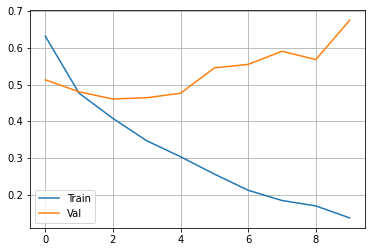

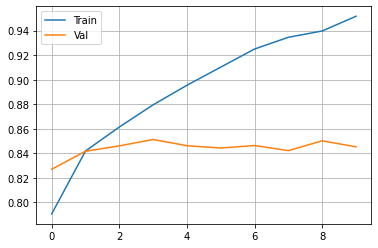

In [98]:
plt.figure()
plt.plot(history_xce.history['loss'],label='Train')
plt.plot(history_xce.history['val_loss'],label='Val')
plt.grid()
plt.legend()
plt.show()
plt.figure()
plt.plot(history_xce.history['accuracy'],label='Train')
plt.plot(history_xce.history['val_accuracy'],label='Val')
plt.grid()
plt.legend()
plt.show()

In [114]:
#Find test accuracy:
y_hat = np.argmax(model_xce.predict(test_images), axis=-1).reshape(10000,1)     # Prediction on test
test_acc = np.mean(y_hat==test_labels)
print(f"Test Accuracy: {test_acc*100:0.2f}%")

#Accuracy by class:
for i in range(0,10):
  class_indicies = np.where(np.transpose(test_labels)[0] == i)
  correct_count = 0
  total_count = 0
  for j in class_indicies[0]:
    if np.transpose(y_hat)[0][j] == np.transpose(test_labels)[0][j]:
      correct_count+=1
      total_count+=1
    else:
      total_count+=1
  class_acc = correct_count/total_count
  print(f"Class {class_names[i]} accuracy: {class_acc*100:0.2f}%")

correct_indices = np.nonzero(y_hat== test_labels)[0]    # Gives list of indices of correctly classified images
incorrect_indices = np.nonzero(y_hat != test_labels)[0]  # Gives list of indices of misclassified images

Test Accuracy: 84.95%
Class airplane accuracy: 83.70%
Class automobile accuracy: 93.20%
Class bird accuracy: 80.30%
Class cat accuracy: 76.00%
Class deer accuracy: 81.60%
Class dog accuracy: 80.60%
Class frog accuracy: 89.10%
Class horse accuracy: 86.30%
Class ship accuracy: 89.10%
Class truck accuracy: 89.60%


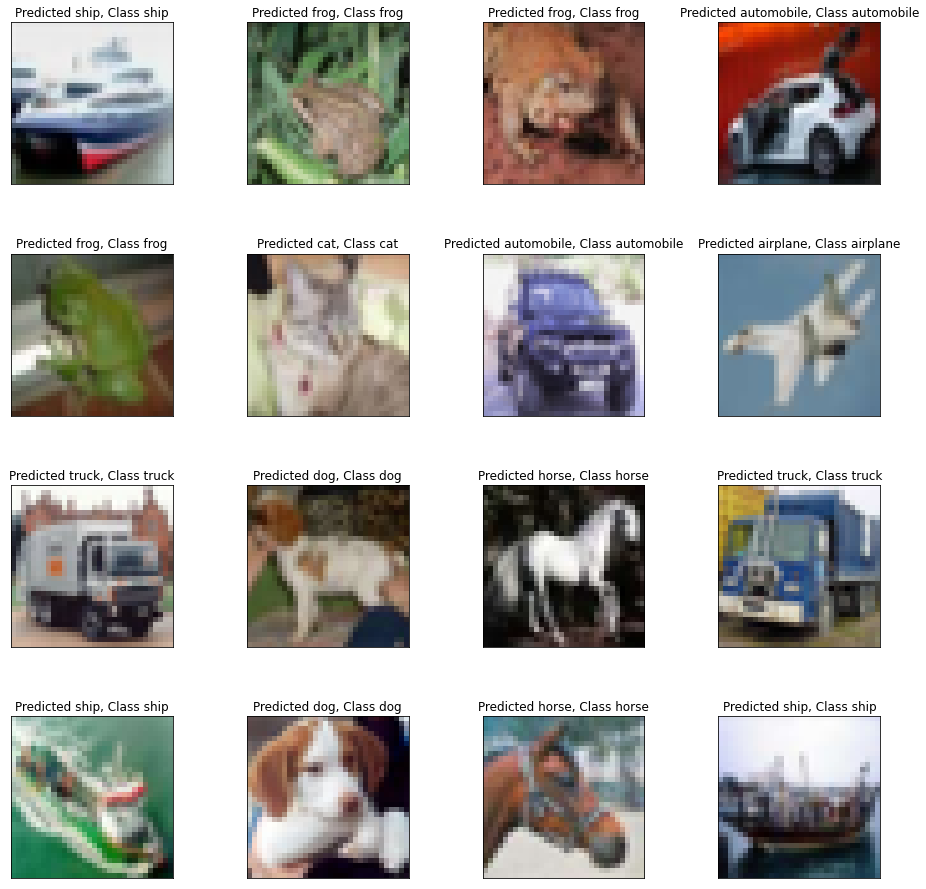

In [115]:
fig = plt.figure()
fig.set_size_inches(13, 13)
for i, index in enumerate(correct_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.title(f"Predicted {class_names[y_hat[index][0]]}, Class {class_names[test_labels[index][0]]}")

plt.tight_layout()

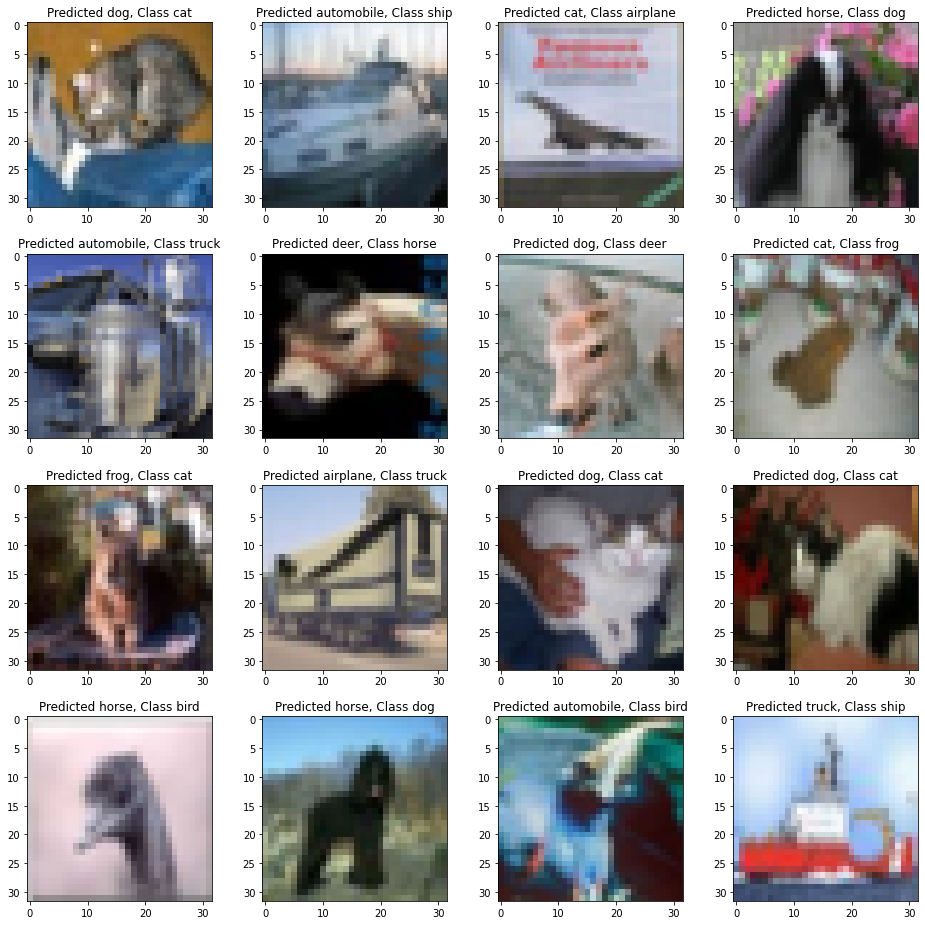

In [116]:
fig = plt.figure()
fig.set_size_inches(13, 13)
for i, index in enumerate(incorrect_indices[:16]):
    plt.subplot(4,4,i+1)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.title(f"Predicted {class_names[y_hat[index][0]]}, Class {class_names[test_labels[index][0]]}")

plt.tight_layout()